In [334]:
"""
https://www.tensorflow.org/tutorials/quickstart/beginner
https://www.tensorflow.org/tutorials/keras/classification
"""

import json
import subprocess
from datetime import datetime

import keras
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

from dj_config.settings import BASE_DIR

In [335]:
"""Verify the installation"""

print(f"tf = {tf.__version__} | tfds = {tfds.__version__}")
print(tf.reduce_sum(tf.random.normal([1000, 1000])))
print(tf.config.list_physical_devices("GPU"))

tf = 2.15.0 | tfds = 4.9.4
tf.Tensor(-55.530365, shape=(), dtype=float32)
[]


In [336]:
"""Load mnist data"""

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0

print(f"{x_train.shape =} | {y_train.shape = }")
print(f"{x_test.shape =} | {y_test.shape = }")

x_train.shape =(60000, 28, 28) | y_train.shape = (60000,)
x_test.shape =(10000, 28, 28) | y_test.shape = (10000,)


In [337]:
print(f"{x_train[0].shape = }")
print(f"X[0] data =")
x_train[0]

x_train[0].shape = (28, 28)
X[0] data =


array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [338]:
print(f"{y_train[0].shape = }")
print(f"Y[0] data (label) =")
y_train[0]

y_train[0].shape = ()
Y[0] data (label) =


5

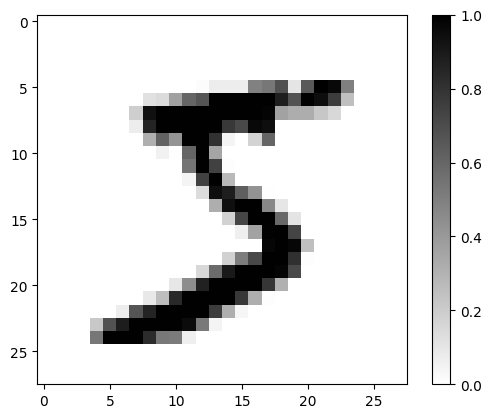

In [339]:
plt.figure()
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

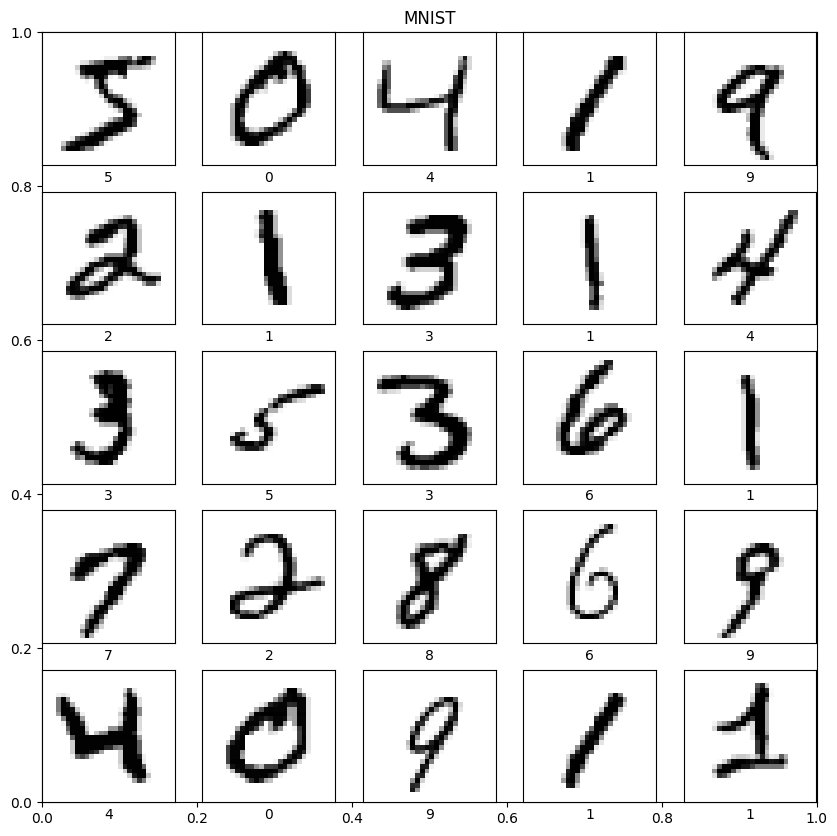

In [340]:
plt.figure(figsize=(10, 10))
plt.title("MNIST")
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

In [341]:
"""---------------mnist_corrupted----------------"""

'---------------mnist_corrupted----------------'

In [342]:
"""https://www.tensorflow.org/datasets/catalog/overview"""

# tfds.list_builders()

'https://www.tensorflow.org/datasets/catalog/overview'

In [343]:
(x_train_c, y_train_c), (x_test_c, y_test_c) = tfds.as_numpy(
    tfds.load(
        "mnist_corrupted",
        split=["train", "test"],
        batch_size=-1,
        shuffle_files=True,
        as_supervised=True,
    )
)

print(f"{x_train_c.shape =} | {y_train_c.shape = }")
print(f"{x_test_c.shape =} | {y_test_c.shape = }")

x_train_c.shape =(60000, 28, 28, 1) | y_train_c.shape = (60000,)
x_test_c.shape =(10000, 28, 28, 1) | y_test_c.shape = (10000,)


In [344]:
x_train_c[:, :, :, 0].shape

(60000, 28, 28)

In [345]:
x_train_c = x_train_c[:, :, :, 0]
x_test_c = x_test_c[:, :, :, 0]

In [346]:
x_train_c, x_test_c = x_train_c / 255.0, x_test_c / 255.0

print(f"{x_train_c.shape =} | {y_train_c.shape = }")
print(f"{x_test_c.shape =} | {y_test_c.shape = }")

x_train_c.shape =(60000, 28, 28) | y_train_c.shape = (60000,)
x_test_c.shape =(10000, 28, 28) | y_test_c.shape = (10000,)


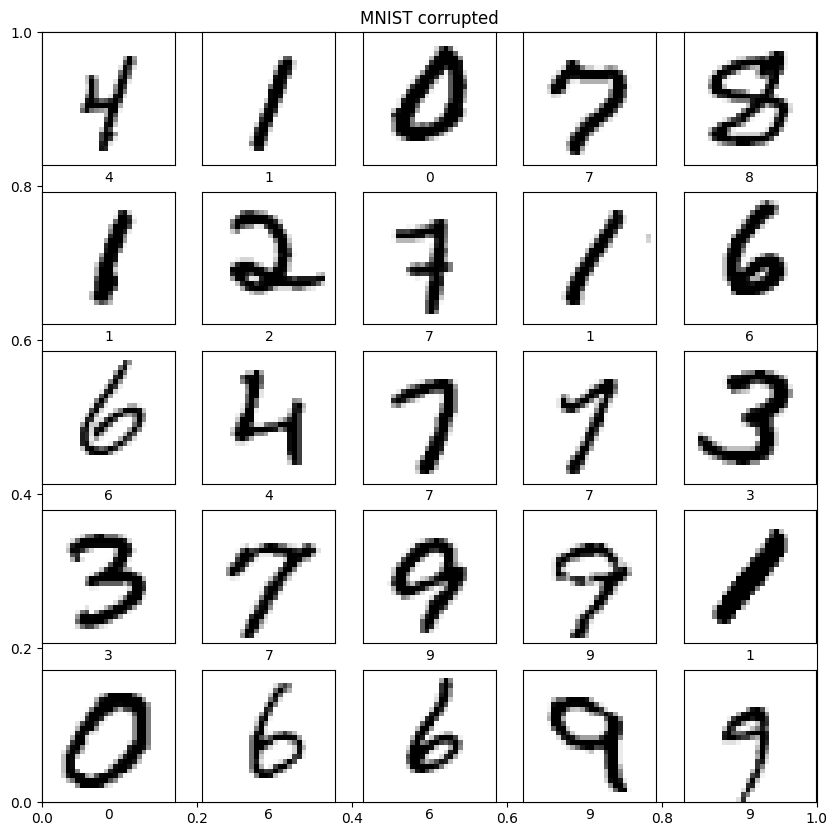

In [347]:
plt.figure(figsize=(10, 10))
plt.title("MNIST corrupted")
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train_c[i], cmap=plt.cm.binary)
    plt.xlabel(y_train_c[i])
plt.show()

In [348]:
"""Build a tf.keras.Sequential model:"""

model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(10),
    ]
)

In [349]:
"""For each example, the model returns a vector of logits or log-odds scores, one for each class."""

predictions = model(x_train[:1]).numpy()
predictions

array([[-0.06180183,  0.5376841 , -0.31731704, -0.53405386,  0.30334622,
         0.6027646 ,  0.39192197,  0.5731795 , -0.09743239,  0.32015505]],
      dtype=float32)

In [350]:
"""The tf.nn.softmax function converts these logits to probabilities for each class:"""

tf.nn.softmax(predictions).numpy()

array([[0.0741017 , 0.13495271, 0.05739306, 0.04620956, 0.10676035,
        0.1440276 , 0.11664818, 0.13982894, 0.07150791, 0.10857003]],
      dtype=float32)

In [351]:
"""Define a loss function for training"""

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [352]:
"""This untrained model gives probabilities close to random (1/10 for each class), so the initial loss should be close to -tf.math.log(1/10) ~= 2.3."""

loss_fn(y_train[:1], predictions).numpy()

1.9377503

In [353]:
"""configure and compile the model"""

model.compile(
    optimizer="adam",
    loss=loss_fn,
    metrics=["accuracy"],
)

In [354]:
"""combine 2 mnist datasets"""

x_train_combo = np.concatenate([x_train, x_train_c])
y_train_combo = np.concatenate([y_train, y_train_c])
print(f"{x_train_combo.shape = } | {y_train_combo.shape = }")

x_test_combo = np.concatenate([x_test, x_test_c])
y_test_combo = np.concatenate([y_test, y_test_c])
print(f"{x_test_combo.shape = } | {y_test_combo.shape = }")

x_train_combo.shape = (120000, 28, 28) | y_train_combo.shape = (120000,)
x_test_combo.shape = (20000, 28, 28) | y_test_combo.shape = (20000,)


In [355]:
"""Train and evaluate your model"""

history = model.fit(x_train_combo, y_train_combo, epochs=3)

Epoch 1/3
3750/3750 [==============================] - 5s 1ms/step - loss: 0.2416 - accuracy: 0.9284
Epoch 2/3
3750/3750 [==============================] - 5s 1ms/step - loss: 0.1176 - accuracy: 0.9646
Epoch 3/3
3750/3750 [==============================] - 4s 1ms/step - loss: 0.0894 - accuracy: 0.9715


In [356]:
"""compare how the model performs on the test dataset"""

test_loss, test_acc = model.evaluate(x_test_combo, y_test_combo, verbose=2)
print(f"Test accuracy: {test_acc}")

625/625 - 0s - loss: 0.0680 - accuracy: 0.9781 - 418ms/epoch - 668us/step
Test accuracy: 0.9781000018119812


In [357]:
"""model.fit() returns a History object that contains a dictionary with everything that happened during training:"""

history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy'])

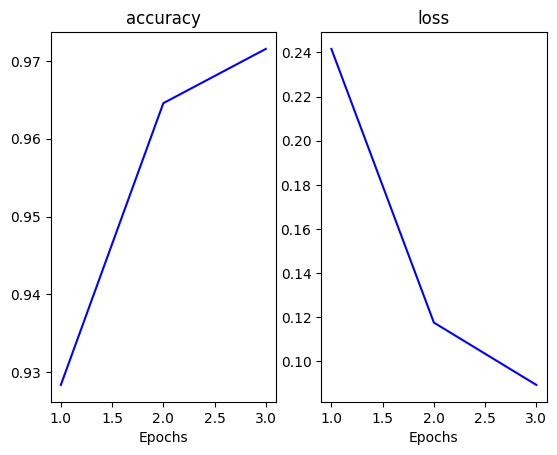

In [358]:
acc = history_dict["accuracy"]
loss = history_dict["loss"]

epochs = range(1, len(acc) + 1)

plt.subplot(121)
plt.plot(epochs, acc, "b", label="accuracy")
plt.title("accuracy")
plt.xlabel("Epochs")

plt.subplot(122)
plt.plot(epochs, loss, "b", label="loss")
plt.title("loss")
plt.xlabel("Epochs")

plt.show()

In [359]:
"""
Make predictions.
With the model trained, you can use it to make predictions about some images. Attach a softmax layer to convert the model's linear outputs—logits—to probabilities, which should be easier to interpret.
"""

probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [360]:
predictions = probability_model.predict(x_test_combo)

625/625 [==============================] - 0s 660us/step


In [361]:
"""Here, the model has predicted the label for each image in the testing set. Let's take a look at the first prediction:"""

predictions[0]

array([4.0656843e-08, 2.4330702e-09, 1.1417985e-06, 1.1414671e-05,
       8.1058832e-12, 2.6502679e-08, 5.8861140e-16, 9.9998683e-01,
       4.0386258e-08, 4.8143465e-07], dtype=float32)

In [362]:
y_test_combo[110]

8

In [363]:
"""Define functions to graph the full set of 10 class predictions."""


def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = "blue"
    else:
        color = "red"

    plt.xlabel(
        "{} {:2.0f}% ({})".format(
            predicted_label, 100 * np.max(predictions_array), true_label
        ),
        color=color,
    )


def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color("red")
    thisplot[true_label].set_color("blue")

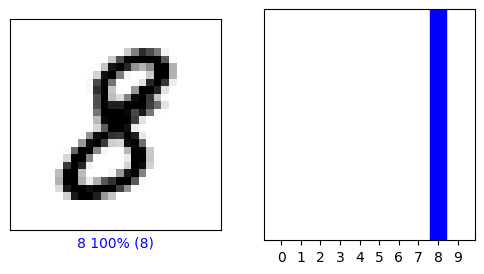

In [364]:
"""Let's look at the 0th image, predictions, and prediction array. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percentage (out of 100) for the predicted label."""

i = 110
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], y_test_combo, x_test_combo)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i], y_test_combo)
plt.show()

In [365]:
np.count_nonzero(x_test_combo[i])

176

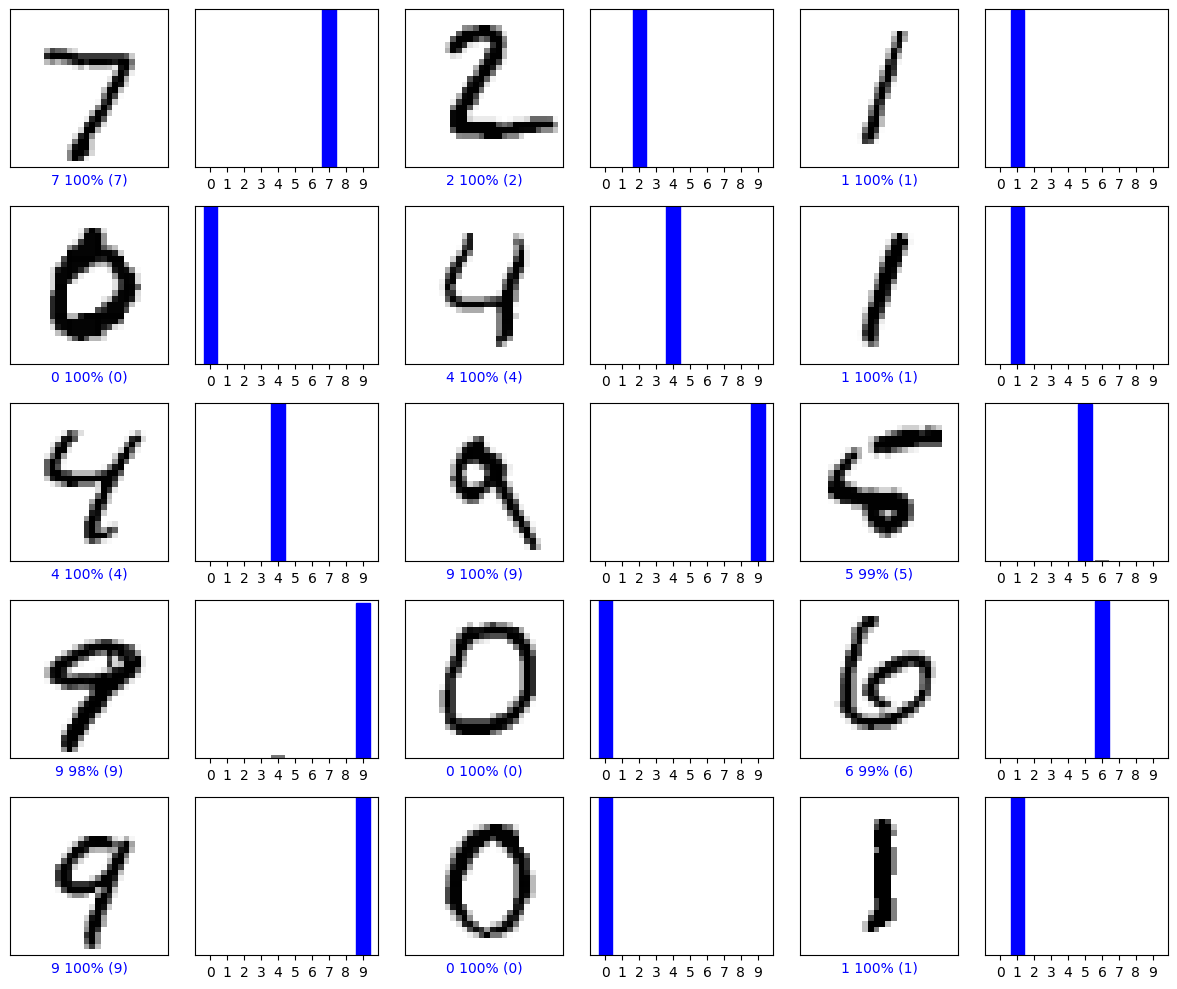

In [366]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions[i], y_test_combo, x_test_combo)
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, predictions[i], y_test_combo)
plt.tight_layout()
plt.show()

In [367]:
"""-----------------------------"""

'-----------------------------'

In [368]:
"""Mine"""

'Mine'

In [369]:
target_for_tf = [
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        1.2148272964336117e-07,
        0.00011595459513470905,
        0.001506397991154112,
        0.016118053210687485,
        0.014989405022513138,
        0.000594322405373183,
        7.212686540993876e-05,
        6.719513483398472e-08,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        9.301021488319898e-08,
        0.0009134966065988615,
        0.26562118731339357,
        0.6413071863103195,
        0.7446925166596603,
        0.742403685136618,
        0.5865252319607358,
        0.16656052915188685,
        0.0005319976918288104,
        1.1389005904065145e-08,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        8.200084250926909e-08,
        0.0005246841272190279,
        0.5320622541035881,
        0.9942089237352129,
        0.8779665072733606,
        0.7709765521828236,
        0.7828529281053618,
        0.9229796540441646,
        0.9980888369724098,
        0.3692080936602129,
        0.00024914581049910917,
        3.0370682410839744e-09,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0001131079282466586,
        0.12269597386493752,
        0.9732549316879422,
        0.7849180096170425,
        0.10101805807919921,
        0.029342693118302857,
        0.03532615142164383,
        0.18275287061302026,
        0.9812836954569872,
        0.9092240398603064,
        0.007508877980881444,
        4.326103687522805e-06,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0003584100492640974,
        0.38448354611938707,
        0.9986741871738698,
        0.3434341380712003,
        0.0002740859937825799,
        0.0,
        0.0,
        0.0007187470683216843,
        0.6507667100105626,
        0.9985575460364986,
        0.13604304380389723,
        9.780093524517069e-05,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0002998532386467238,
        0.3220225297593192,
        0.9987009844743772,
        0.424207378116684,
        0.0003640104228307901,
        0.0,
        0.0,
        0.0008675033274771132,
        0.7247810673897513,
        0.9937576781368456,
        0.058860500434920644,
        4.1554094647721256e-05,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        2.534389360749873e-05,
        0.028486007529016682,
        0.8561302366447066,
        0.8947026821703631,
        0.23366240299052687,
        0.000901480991230709,
        0.0011168901601949172,
        0.3632862158397415,
        0.9935870272072405,
        0.6185877284802584,
        0.0007418527426464599,
        3.872262007382168e-08,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        1.817685342288805e-06,
        0.25248079030808657,
        0.9162059598935817,
        0.9930784479264214,
        0.6387868149614688,
        0.6901992369791539,
        0.9666536899629867,
        0.7176131969989856,
        0.05884266527063934,
        4.236710196312256e-07,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        1.9930760332114112e-07,
        0.0012283612636085908,
        0.39770043921995635,
        0.9689363120415745,
        0.9988629214392724,
        0.9995018376642888,
        0.8605901420889258,
        0.1519661750674498,
        0.0005091997904209626,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        7.629524650336045e-06,
        0.008726659283306057,
        0.5617887933857324,
        0.9821829136837222,
        0.7204041161254829,
        0.312950646106208,
        0.5959991323679685,
        0.8971488986902665,
        0.9867315494048792,
        0.36531321017269425,
        0.0004547747111236784,
        1.1085299079956706e-07,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.00042718934634570946,
        0.4477583281358252,
        0.98610191371883,
        0.518068675372891,
        0.02949102770181083,
        0.0001457776396803843,
        0.002780628311610257,
        0.14099442493993847,
        0.876877321620875,
        0.9629559844371658,
        0.21152825545669166,
        0.00015290756660506208,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.02464858311425122,
        0.9506189780020537,
        0.8729470743635479,
        0.009640527818082235,
        5.9665600417814e-06,
        0.0,
        0.0,
        0.00017839420241989192,
        0.11882838057398128,
        0.9758603359667263,
        0.672026709241897,
        0.0004884781745250307,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0679274358963383,
        0.9981459826901282,
        0.7666384618933226,
        0.0011064418368531938,
        0.0,
        0.0,
        0.0,
        1.435014743912206e-07,
        0.001973182480568267,
        0.9286449808411512,
        0.7816411993259479,
        0.0005683759530725434,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.01092377602063961,
        0.8623346606368678,
        0.9489267106739581,
        0.17264628813002408,
        0.00044499856874739385,
        3.0370682410840437e-07,
        2.1370849103001635e-05,
        0.0008927647356650859,
        0.3828115442982499,
        0.9951912950237309,
        0.5200475710534479,
        0.0003777010961424545,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.00020758889853518425,
        0.22341074191477786,
        0.9589328405776429,
        0.929038666071074,
        0.3647572906233648,
        0.13962052188210983,
        0.1563212294629821,
        0.5128076102421748,
        0.998525764287892,
        0.8617359750301109,
        0.0364980974081719,
        2.555117351495252e-05,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        1.5033487793366002e-07,
        0.00041088889746879697,
        0.28189271893764745,
        0.7760102642771363,
        0.9892199649717252,
        0.9883163493223306,
        0.9927723313564495,
        0.9632215130216966,
        0.6437536707173392,
        0.14684733832258504,
        0.00010559082512671756,
        1.8222409446504148e-08,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.00015769416576463962,
        0.0023128638127813896,
        0.08766691377721006,
        0.1936617030569315,
        0.18485933074905833,
        0.05101390483404802,
        0.0007806549738451781,
        3.2058551455683625e-05,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        5.434203956513178e-07,
        3.76491144211379e-05,
        8.397256483808782e-05,
        8.012490927455385e-05,
        2.165237730086924e-05,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
]

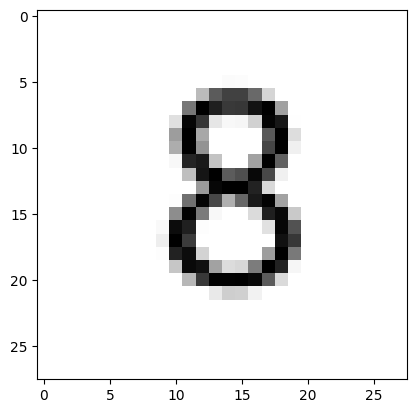

In [370]:
plt.imshow(target_for_tf, cmap=plt.cm.binary)
plt.show()

In [371]:
my_img = np.array(target_for_tf)

In [372]:
print(f"{my_img.shape = }")
my_img

my_img.shape = (28, 28)


array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000

In [373]:
# Add the image to a batch where it's the only member.
img_to_predict = np.expand_dims(my_img, axis=0)

print(f"{img_to_predict.shape = }")

img_to_predict.shape = (1, 28, 28)


In [374]:
predictions_single = probability_model.predict(img_to_predict)

predictions_single

1/1 [==============================] - 0s 42ms/step


array([[0.2109504 , 0.00135673, 0.04699701, 0.16331144, 0.006493  ,
        0.02240177, 0.01284301, 0.01513061, 0.3679218 , 0.15259427]],
      dtype=float32)

In [375]:
test_prediction = np.argmax(predictions_single[0])
test_prediction

8

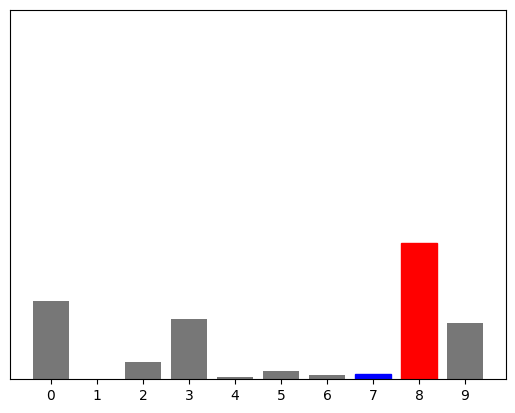

In [376]:
plot_value_array(0, predictions_single[0], y_test)

In [377]:
if test_prediction != 8:
    raise Exception("Wrong prediction")

In [378]:
"""-------save model------"""

'-------save model------'

In [379]:
model_version = datetime.now().strftime("%Y_%m_%d_%H_%M")

"""# The file needs to end with the .keras extension"""
model_save_path = f"{BASE_DIR}/ml_data/trained_mnist_{model_version}.keras"

model.save(model_save_path)

In [380]:
"""Loading the model back:"""

reconstructed_model = keras.models.load_model(model_save_path)

In [381]:
"""Let's check:"""

np.testing.assert_allclose(
    model.predict(x_test_combo),
    reconstructed_model.predict(x_test_combo),
)

625/625 [==============================] - 0s 531us/step


In [382]:
reconstructed_probability_model = tf.keras.Sequential(
    [reconstructed_model, tf.keras.layers.Softmax()]
)
reconstructed_predictions = reconstructed_probability_model.predict(x_test_combo)

625/625 [==============================] - 0s 517us/step


1/1 [==============================] - 0s 36ms/step
reconstructed_predictions_single = array([[0.2109504 , 0.00135673, 0.04699701, 0.16331144, 0.006493  ,
        0.02240177, 0.01284301, 0.01513061, 0.3679218 , 0.15259427]],
      dtype=float32)
predictions number = 8


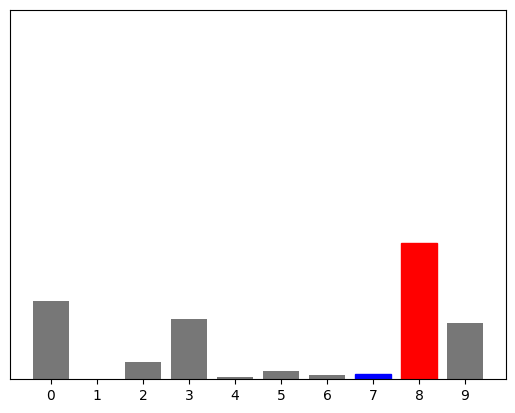

In [383]:
reconstructed_predictions_single = reconstructed_probability_model.predict(
    img_to_predict
)

print(f"{reconstructed_predictions_single = }")
print(f"predictions number = {np.argmax(reconstructed_predictions_single[0])}")
plot_value_array(0, reconstructed_predictions_single[0], y_test)

In [384]:
"""save x_test_combo data"""

x_test_path = f"{BASE_DIR}/ml_data/x_test_{model_version}.json"

with open(x_test_path, "w") as report_file:
    json.dump(
        obj=x_test_combo.tolist(),
        fp=report_file,
        ensure_ascii=False,
    )

In [385]:
command_str = f"xz {x_test_path}"

subprocess.run(
    command_str.split(" "),
    capture_output=True,
    check=True,
    encoding="utf-8",
)

CompletedProcess(args=['xz', '/home/valikq/PycharmProjects/SudokuML/ml_data/x_test_2024_02_07_17_03.json'], returncode=0, stdout='', stderr='')

In [386]:
"""----------------DONE-------------------"""

'----------------DONE-------------------'